In [1]:
import numpy as np 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', low_memory=False)
df = pd.read_parquet('Motor_Vehicle_Collisions_-_Crashes.pq')

In [4]:
my_auto = ['Sedan', 'PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'Station Wagon/Sport Utility Vehicle', '4 dr sedan', 'Pick-up Truck', 'VAN', 'PICK-UP TRUCK', 'LIVERY VEHICLE', 'Van', '2 dr sedan', 'Box Truck', 'Convertible', 'Flat Bed']
my_motorcycle = ['Motorcycle', 'MOTORCYCLE']
my_taxi = ['Taxi', 'TAXI']
my_bus = ['Bus','BUS']
my_bike = ['Bike', 'E-Bike']
my_ambulance = ['AMBULANCE', 'Ambulance']
my_moped = ['Moped']
my_commercial = ['LARGE COM VEH(6 OR MORE TIRES)', 'SMALL COM VEH(4 TIRES)', 'Tractor Truck Diesel']

In [5]:
df['VEHICLE TYPE CODE 1'].value_counts().head(30)

Sedan                                  426323
Station Wagon/Sport Utility Vehicle    325932
Taxi                                    37693
Pick-up Truck                           25022
Box Truck                               17530
Bus                                     14629
Bike                                    10303
Tractor Truck Diesel                     7215
Van                                      5846
Motorcycle                               5595
Ambulance                                3011
Convertible                              2642
Dump                                     2634
E-Bike                                   1839
Flat Bed                                 1741
PK                                       1611
Garbage or Refuse                        1564
E-Scooter                                1290
Carry All                                1268
Tractor Truck Gasoline                   1042
Tow Truck / Wrecker                       881
Moped                             

In [6]:
# uniform vehicle type

df['vehicle'] = pd.Series([], dtype='object')
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_auto), 'vehicle'] = 'automobile'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_motorcycle), 'vehicle'] = 'motorcycle'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_taxi), 'vehicle'] = 'taxi'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_bus), 'vehicle'] = 'bus'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_bike), 'vehicle'] = 'bike'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_ambulance), 'vehicle'] = 'ambulance'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_moped), 'vehicle'] = 'moped'
df.loc[df['VEHICLE TYPE CODE 1'].isin(my_commercial), 'vehicle'] = 'commercial'

In [7]:
# get rid of large titles
df.rename(columns = {'NUMBER OF PERSONS INJURED':'injured', 'NUMBER OF PERSONS KILLED': 'killed', \
                     'NUMBER OF PEDESTRIANS INJURED': 'ped_inj', 'NUMBER OF PEDESTRIANS KILLED': 'ped_kill', 'NUMBER OF CYCLIST INJURED': 'cyc_inj', \
                     'NUMBER OF CYCLIST KILLED': 'cyc_kill', 'NUMBER OF MOTORIST INJURED': 'mot_inj', 'NUMBER OF MOTORIST KILLED': 'mot_kill'}, inplace=True)

my_cols = ['vehicle', 'injured', 'killed', 'ped_inj', 'ped_kill', 'cyc_inj', 'cyc_kill', 'mot_inj', 'mot_kill']

In [8]:
df[['vehicle', 'injured', 'killed', 'ped_inj', 'ped_kill', 'cyc_inj', 'cyc_kill', 'mot_inj', 'mot_kill']].sample(10)

,vehicle,injured,killed,ped_inj,ped_kill,cyc_inj,cyc_kill,mot_inj,mot_kill
373263,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469568,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663654,bike,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
208515,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637094,bike,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
575066,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
662613,taxi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301413,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574792,automobile,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
376571,automobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.groupby('vehicle').ped_kill.sum().sort_values(ascending=True)

vehicle
moped           0.0
ambulance       3.0
motorcycle      3.0
bike            8.0
commercial     15.0
taxi           19.0
bus            34.0
automobile    489.0
Name: ped_kill, dtype: float64

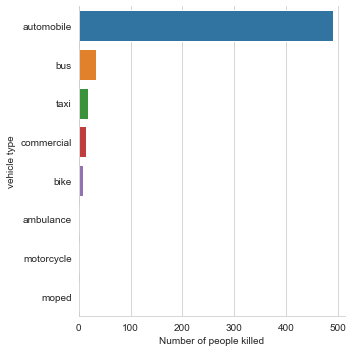

In [10]:
# Who kills pedestrians ?
df_who_kills = df.groupby('vehicle', as_index=False).ped_kill.sum().sort_values(by='ped_kill', ascending=False).copy(deep=True)

g=sns.catplot(y='vehicle', x='ped_kill', data=df_who_kills, kind='bar',orient='h')
g.set(xlabel='Number of people killed', ylabel='vehicle type')

plt.show()

In [11]:
# NYS Vehicle Registrations of File - End of year 2018  https://dmv.ny.gov/statistic/2018reginforce-web.pdf

# automobile_qty = 1912468
# motorcycle_qty = 44784
# commercial_qty = 75069
# moped_qty = 2283
# bus_qty = 8573
# taxi_qty = 111562
# ambulance_qty = 1935

stat_dict = {
'automobile': 1912468,
'taxi': 111562,
'bike': 773000, # https://www1.nyc.gov/html/dot/html/bicyclists/cyclinginthecity.shtml
'bus': 8573,
'motorcycle': 44784,
'commercial': 75069,
'ambulance': 1935,
'moped': 2283
}

# Who gets killed more often?

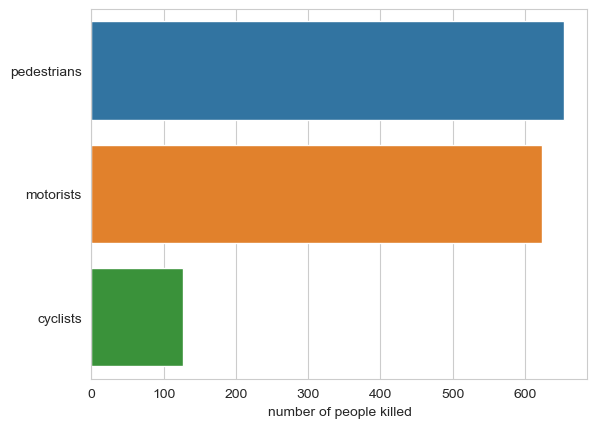

In [12]:
a = [df.ped_kill.sum(), df.mot_kill.sum(), df.cyc_kill.sum()]
labels = ['pedestrians', 'motorists', 'cyclists']

sns.barplot(x=a, y=labels)
plt.xlabel('number of people killed')

plt.show()

# Driving which vehicle is more likely to injure a pedestrian

In [13]:
df[my_cols].tail()

,vehicle,injured,killed,ped_inj,ped_kill,cyc_inj,cyc_kill,mot_inj,mot_kill
914164,NaN,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
914165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
914166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
914167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
914168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


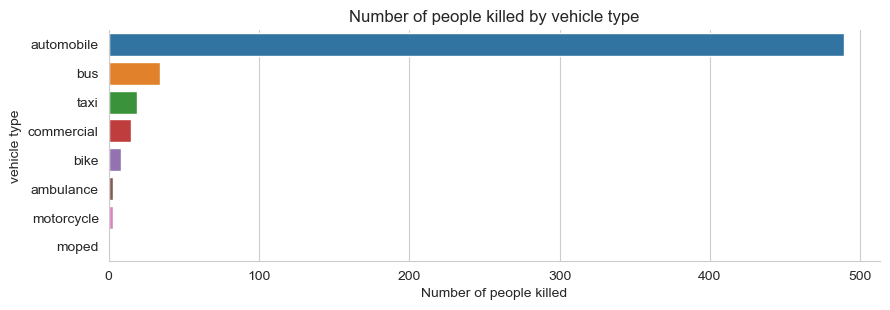

In [14]:
# Who kills pedestrians ?
df_who_kills = df.groupby('vehicle', as_index=False).ped_kill.sum().sort_values(by='ped_kill', ascending=False).copy(deep=True)

g=sns.catplot(y='vehicle', x='ped_kill', data=df_who_kills, kind='bar',orient='h', height=3, aspect=3)
g.set(xlabel='Number of people killed', ylabel='vehicle type')
plt.title('Number of people killed by vehicle type')
plt.show()

In [15]:
# Casualty RATE by vehicle type - PEDESTRIANS

df_rate = df.groupby('vehicle')[['ped_inj', 'ped_kill']].sum()
df_rate['registred'] = df_rate.index.map(stat_dict)
df_rate['rate_inj_per_1K'] = df_rate.ped_inj / df_rate.registred * 1000
df_rate['rate_kill_per_10K'] = df_rate.ped_kill / df_rate.registred * 10000
#df_rate.sort_values(by='rate', ascending=False, inplace=True)

In [16]:
df_rate

,ped_inj,ped_kill,registred,rate_inj_per_1K,rate_kill_per_10K
vehicle,,,,,
ambulance,52.0,3.0,1935,26.873385,15.503876
automobile,38067.0,489.0,1912468,19.904647,2.556906
bike,1643.0,8.0,773000,2.125485,0.103493
bus,719.0,34.0,8573,83.867958,39.659396
commercial,57.0,15.0,75069,0.759301,1.998162
moped,96.0,0.0,2283,42.049934,0.000000
motorcycle,283.0,3.0,44784,6.319221,0.669882
taxi,2488.0,19.0,111562,22.301501,1.703089


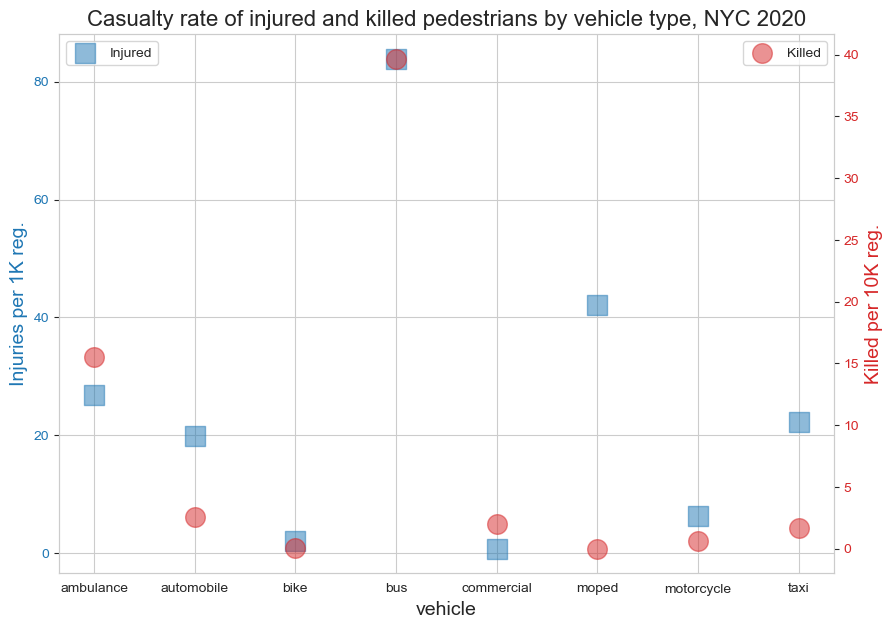

In [17]:
x1 = df_rate.index
y1 = df_rate.rate_inj_per_1K

x2 = df_rate.index
y2 = df_rate.rate_kill_per_10K

fig, ax1  = plt.subplots(figsize=(10,7))
color = 'tab:blue'
ax1.set_xlabel('vehicle', size=14)
ax1.set_ylabel('Injuries per 1K reg.', color=color, size=14)
ax1.scatter(x1, y1, marker='s', color=color, label='Injured', alpha=0.5, s=200)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Killed per 10K reg.', color=color, size=14)  # we already handled the x-label with ax1
ax2.scatter(x2, y2, color=color, label='Killed', alpha=0.5, marker='o', s=200)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Casualty rate of injured and killed pedestrians by vehicle type, NYC 2020', size=16)
plt.grid()
plt.show()